<a href="https://colab.research.google.com/github/Joako360/osm2terrn/blob/main/osm2tern_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from typing import Dict, Tuple
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
# ...existing code...
# Add project root and src to sys.path so absolute imports like `from src.utils...` work in this notebook.
import sys
from pathlib import Path

cwd = Path.cwd()
# Heuristics to find repo root
candidates = [cwd, cwd.parent, cwd.parent.parent, Path("C:/Users/Joaquin/OneDrive/Documentos/GitHub/osm2terrn")]
added = []
for p in candidates:
    if not p.exists():
        continue
    if (p / "src").exists() or (p / ".git").exists():
        sys.path.insert(0, str(p))
        sys.path.insert(0, str(p / "src"))
        added.append(str(p))
        print("Added to sys.path:", p, "and", p / "src")
        break

if not added:
    print("Warning: could not locate repo root. You can also run `pip install -e .` in the repo root.")
# ...existing code...
from src.utils.constants import custom_tags, map_geometries, networks
from src.utils.geometry import translate_gdf, transform_gdf

Added to sys.path: c:\Users\Joaquin\OneDrive\Documentos\GitHub\osm2terrn and c:\Users\Joaquin\OneDrive\Documentos\GitHub\osm2terrn\src


In [34]:

ox.settings.elevation_url_template = 'https://api.opentopodata.org/v1/test-dataset?locations={locations}' # type: ignore
ox.settings.log_console = True # type: ignore
ox.settings.use_cache=True # type: ignore
ox.settings.useful_tags_way = ox.settings.useful_tags_way + custom_tags # type: ignore
ox.__version__

'2.0.1'

In [ ]:

# get the street network for luis guillon
place = 'Luis Guillón, Buenos Aires, Argentina'
place_query = {'city':'Luis Guillón', 'state':'Buenos Aires', 'country':'Argentina'}
G = ox.graph_from_place(place_query, network_type='drive', simplify=True)
G = ox.add_node_elevations_google(G, api_key=None, batch_size=100, pause=1)
G = ox.add_edge_bearings(G)
G = ox.add_edge_grades(G)
G_proj = ox.project_graph(G)
nodes, edges=ox.graph_to_gdfs(G_proj)

area=ox.geocode_to_gdf(place_query)
buildings=ox.features_from_place(place_query, tags={'building': True})

area_proj=ox.projection.project_gdf(area)
buildings_proj=ox.projection.project_gdf(buildings)
x_0 = area_proj.bounds.minx[0]
y_0 = area_proj.bounds.maxy[0]

area_trns=translate_gdf(area_proj,x_0,y_0)
nodes_trns=translate_gdf(nodes,x_0,y_0)
edges_trns=translate_gdf(edges,x_0,y_0)
buildings_trns=translate_gdf(buildings_proj,x_0,y_0)

<Axes: >

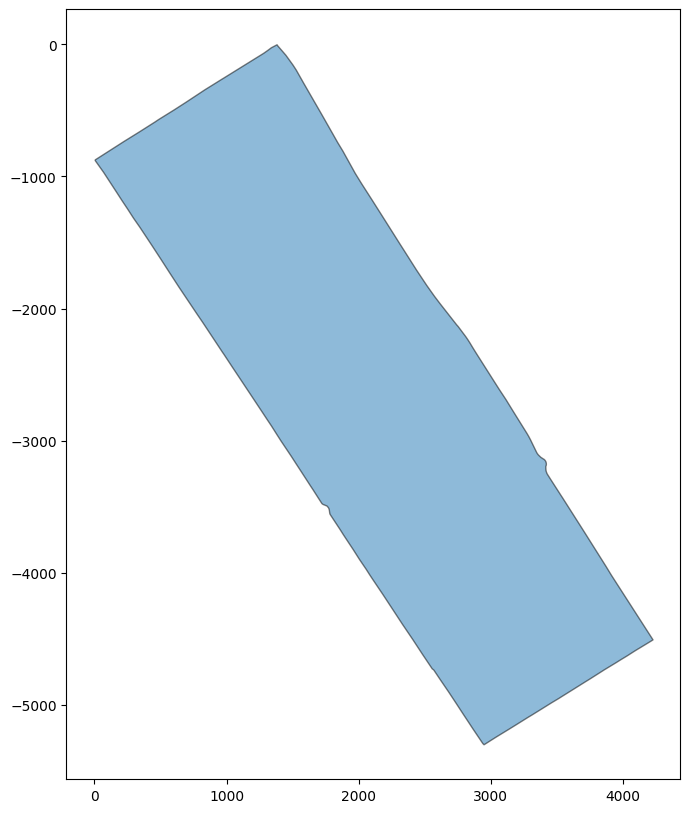

In [23]:
area_trns.plot(figsize=(10,10), alpha=0.5, edgecolor='k')

<Axes: >

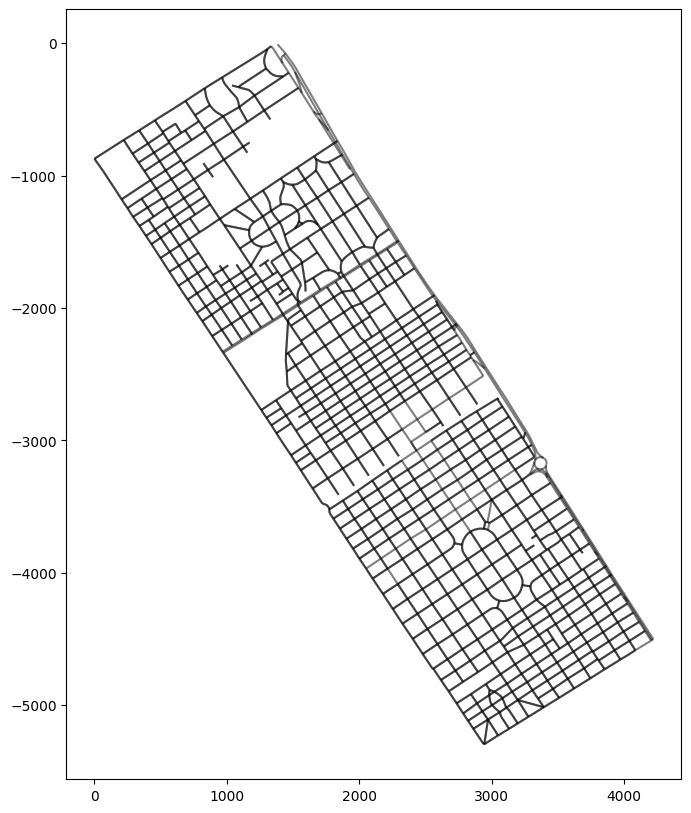

In [19]:
edges_trns.plot(figsize=(10,10), alpha=0.5, edgecolor='k')

<Axes: >

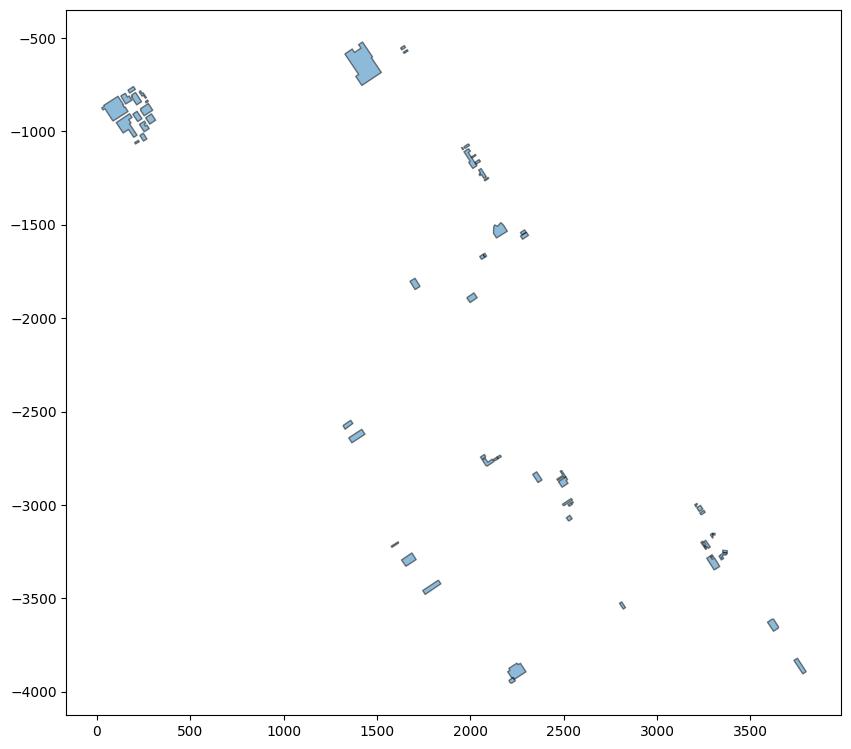

In [18]:
buildings_trns.plot(figsize=(10,10), alpha=0.5, edgecolor='k')

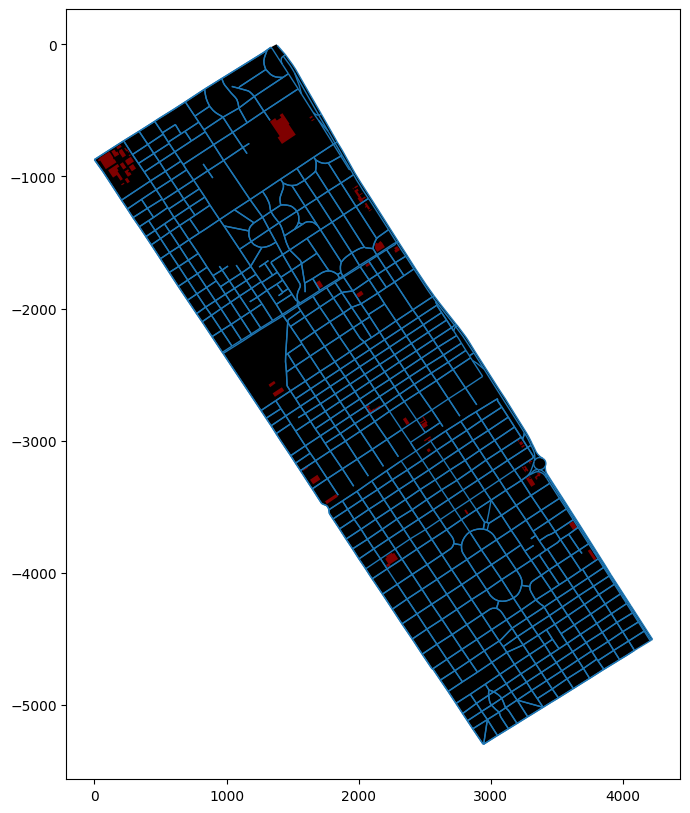

In [24]:

fig, ax = plt.subplots(figsize=[10,10])
area_trns.plot(ax=ax,facecolor='k')
edges_trns.plot(ax=ax,linewidth=1)
buildings_trns.plot(ax=ax,facecolor='r',alpha=0.5)
plt.show()
# lat=np.arange(area.bbox_south[0],area.bbox_north[0],1/3600)
# lon=np.arange(area.bbox_west[0],area.bbox_east[0],1/3600)

In [39]:
place_query = {'city':'Llavallol', 'state':'Buenos Aires', 'country':'Argentina'}
d: Dict = {}
for typ, tag in map_geometries.items():
    try:
        # use bbox query in lat/lon (north, south, east, west)
        gdf = ox.features_from_place(place_query, tags=tag)  # type: ignore
        if gdf is None or gdf.empty:
            d[typ] = None
        else:
            d[typ] = transform_gdf(gdf, x_0, y_0)
    except Exception as exc:
        d[typ] = None

<Axes: >

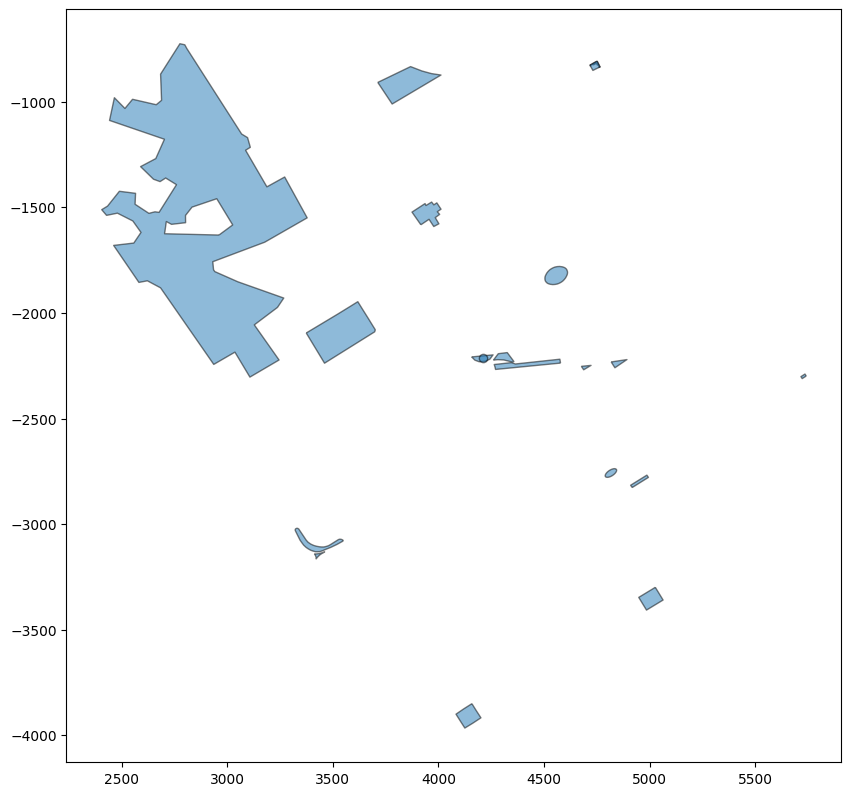

In [41]:
d['parks'].plot(figsize=(10,10), alpha=0.5, edgecolor='k')